In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados.csv')

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
from scipy.special import comb

In [5]:
combinacoes = comb(60,6)
combinacoes

50063860.0

In [6]:
1/combinacoes

1.997448858318156e-08

In [7]:
combinacoes = comb(25,20)
combinacoes

53130.0

In [8]:
1/combinacoes

1.8821757952192734e-05

# Problema do concurso para cientista de dados - Distribuição Binomial

n = 10 -> numero de experimentos
probabilidade de sucesso p = 1/3
probabilidade de fracasso q = 2/3
k = 5
P(5) = (10, 5) x p ^ k x q ^ n - k

In [9]:
p_5 = comb(10,5) * ((1/3)**5) * ((2/3) ** 5)

In [10]:
p_5

0.13656454808718174

Passar para a proxima fase = 1 - P (k < 5)
Temos que somar as probabilidade de P(k == 0) + P(k == 1) + P(k == 2) + P(k == 3) + P(k == 4)
Depois fazer a diferença de 1 com essa soma

In [11]:
p_0 = comb(10,0) * ((1/3) ** 0) * ((2/3) ** 10)

In [12]:
p_1 = comb(10,1) * ((1/3) ** 1) * ((2/3) ** 9)

In [13]:
p_2 = comb(10,2) * ((1/3) ** 2) * ((2/3) ** 8)

In [14]:
p_3 = comb(10,3) * ((1/3) ** 3) * ((2/3) ** 7)

In [15]:
p_4 = comb(10,4) * ((1/3) ** 4) * ((2/3) ** 6)

In [16]:
1 - (p_0 + p_1 + p_2 + p_3 + p_4)

0.21312808006909567

 Além de fazer esse calculo na mao podemos utilizar a funcionalidade do scipy

In [17]:
from scipy.stats import binom

In [18]:
binom.pmf(5,10,1/3)

0.1365645480871816

In [19]:
1 - (binom.pmf(0,10,1/3) + binom.pmf(1,10,1/3) + binom.pmf(2,10,1/3) + binom.pmf(3,10,1/3) + binom.pmf(4, 10 , 1/3))

0.21312808006909423

In [20]:
1 - (binom.pmf([0,1,2,3,4], 10, 1/3).sum())

0.21312808006909423

In [21]:
1 - binom.cdf(4,10, 1/3)

0.21312808006909523

In [22]:
binom.sf(4,10, 1/3)

0.21312808006909525

 # Problema da Moeda - Distribuição Binomial

Uma moeda é lançada 4 vezes pro alto
p(coroa) = 0.5
s(cara) = 0.5
2 vezes coroa

In [23]:
binom.pmf(2,4,0.5)

0.375

# Problema dos Dados - Distribuição Binomial

Um dado é lançado pro alto 10 vezes
Calcule a probabilidade do numero 5 cair pelo menos 3 vezes
p = 1/6
q = 5/6
P(k >= 3) = 1 - P(k < 3) = 1 - (P(k == 0) + P(k == 1) + P( k == 2))

In [24]:
binom.sf(2, 10, 1/6)

0.22477320212874055

# Problema da Gincana - Distribuição Binomial

Sabe-se que a proporção de partici do sexo F foi de 60%. O total de equipes,com 12 integrantes, inscritas na gincana é de 30. Quantas equipes deverão ser formadas por 8 mulheres?

Experimento : seleção de homens e mulheres

p(mulheres) = 0.6
n = 12
k = 8

In [25]:
p_m = binom.pmf(8,12, 0.6)
p_m

0.21284093952

In [26]:
30 * p_m

6.3852281856

Essa é a quantidade de equipes que serão formadas por 8 mulheres. Arredondamos esse valor para 6 equipes

# Problema de Ter Olhos Azuis - Distribuição Binomial

p casal ter filho com olhos azuis = 0.22
Em 50 familias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis

In [27]:
p_a = binom.pmf(2 ,3, 0.22)
p_a

0.11325599999999993

In [28]:
50 * p_a

5.662799999999996

Essa é a quantidade de familias que possui 2 crianças de 3 no total com olhos azuis. Arredondamos esse valor para 5.

# Problema do Delivery - Distribuição Poisson

Um restaurante recebe em média 20 pedidos por hora. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante recebe 15 pedidos?

In [29]:
import numpy as np

In [30]:
np.e

2.718281828459045

u = 20
k = 15

In [31]:
from scipy.stats import poisson

In [32]:
poisson.pmf(15, 20)

0.05164885353175814

# Problema da Padaria - Distribuição de Poisson

O numero medio de clientes que entram em uma padaria por hora é 20. Obtenha a probabilidade de na proxima hora entrar 25 clientes

u = 20
k = 25

In [33]:
poisson.pmf(25, 20)

0.04458764910826764

# Problema da Altura - Distribuição Normal

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma distribuição normal com média de 1.70 e desvio padrao de 0.1

Encontre a prob de uma pessoa ter menos de 1.8m

In [34]:
from scipy.stats import norm

In [35]:
media = 1.7
desvio = 0.1

In [36]:
z = (1.8 - media) / desvio
z

1.0000000000000009

Usando a tabela padronizada temos que a prob de z == 1 vale 0.8413

In [37]:
p = 0.8413
p

0.8413

Utilizando o scipy, temos

In [38]:
p = norm.cdf(z)
p

0.8413447460685431

Encontre a probabilidade de uma pesssoa ter entre 1.60 e 1.80

Para encontrarmos essa prob,basta fazermos a difrenças das probiblidades de Z assumindo o valor padrao de 1.6 e Z assumindo o valor de 1.8

In [39]:
z1 = (1.6 - media) / desvio
z2 = (1.8 - media) / desvio

In [40]:
prob = norm.cdf(z2) - norm.cdf(z1)
prob

0.6826894921370857

Encontre a probabilidade de uma pessoa ter mais de 1.90m

In [41]:
z = (1.9 - media)/desvio

Para encontrarmos a prob de ter mais de 1.9 basta pegarmos o todo que vale 1 - a prob de z ser menos q 1.9

In [42]:
prob = 1 - norm.cdf(z)
prob

0.02275013194817921

# Problema da Prova de estatística - Distribuição Normal

A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [43]:
media = 70
desvio = 5

In [44]:
z = (85 - media)/ desvio
z

3.0

In [45]:
p = norm.cdf(z)
p

0.9986501019683699

# Problema do faturamento diario - Distribuição Normal

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R$ 250,00 e R$ 350,00

2) Entre R$ 400,00 e R$ 500,00

In [46]:
media = 300
desvio = 50

In [47]:
z1 = (250 - media)/desvio
z2 = (350 - media)/desvio

In [48]:
prob = norm.cdf(z2) - norm.cdf(z1)
prob

0.6826894921370859

In [49]:
z1 = (400 - media)/desvio
z2 = (500 - media)/desvio

In [50]:
prob = norm.cdf(z2) - norm.cdf(z1)
prob

0.02271846070634609

# Problema da Vida Util - Distribuição Normal

In [51]:
media = 720
desvio = 30

In [52]:
z1 = (650 - media) / desvio
z2 = (750 - media) / desvio 

In [53]:
prob = norm.cdf(z2) - norm.cdf(z1)
prob

0.8315294174398976

In [54]:
z = (800 - media) / desvio

In [55]:
prob = 1 - norm.cdf(z)
prob

0.003830380567589775

In [56]:
z = (700 - media) / desvio

In [57]:
prob = norm.cdf(z)
prob

0.2524925375469229

# Obtendo Probabilidades - Distribuição Normal

In [58]:
prob = norm.cdf(1.96)
prob

0.9750021048517795

In [59]:
prob = 1 - norm.cdf(2.15)
prob

0.015777607391090465

In [60]:
prob = norm.cdf(-(0.78))
prob

0.21769543758573312

In [61]:
prob = 1 - norm.cdf(0.59)
prob

0.27759532475346493

# Técnicas de Amostragem

In [62]:
dados.shape

(76840, 7)

In [63]:
amostra = dados.sample(n = 100, random_state = 101)

In [64]:
amostra.shape

(100, 7)

In [65]:
dados.Renda.mean()

2000.3831988547631

In [66]:
amostra.Renda.mean()

2150.85

In [67]:
dados.Sexo.value_counts(normalize = True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [68]:
amostra.Sexo.value_counts(normalize = True)

Sexo
0    0.69
1    0.31
Name: proportion, dtype: float64

# Estimação 

In [69]:
n = 2000
total_amostras = 1500

In [70]:
amostras = pd.DataFrame()

In [71]:
for i in range(0, total_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['Amostra_' + str(i)] = _

C:\Users\guigu\AppData\Local\Temp\ipykernel_2196\3536237626.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\guigu\AppData\Local\Temp\ipykernel_2196\3536237626.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\guigu\AppData\Local\Temp\ipykernel_2196\3536237626.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [72]:
amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,45,27,40,60,51,40,66,41,41,58,...,32,46,45,47,49,27,30,48,47,28
1,49,37,35,30,52,38,48,47,44,52,...,36,47,33,29,32,51,48,51,58,56
2,25,37,52,70,32,29,39,52,64,58,...,39,26,51,27,29,64,45,26,40,72
3,36,65,46,60,43,38,22,30,40,47,...,27,35,38,41,45,35,45,26,34,31
4,60,33,52,52,58,57,29,65,21,35,...,34,37,52,52,35,51,54,53,49,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,41,45,31,50,35,39,35,49,26,18,...,48,29,45,59,52,28,38,59,38,65
1996,36,40,43,57,28,42,64,54,43,47,...,47,54,45,38,31,40,45,21,44,38
1997,35,50,49,22,50,36,52,20,55,42,...,29,44,23,60,43,42,54,43,48,50
1998,48,37,60,43,58,33,50,54,56,22,...,62,53,47,23,44,53,45,53,58,28


In [73]:
amostras.mean()

Amostra_0       44.1935
Amostra_1       43.6895
Amostra_2       44.2585
Amostra_3       43.6275
Amostra_4       44.0230
                 ...   
Amostra_1495    44.0025
Amostra_1496    43.8345
Amostra_1497    43.6560
Amostra_1498    44.3530
Amostra_1499    43.9960
Length: 1500, dtype: float64

O teorema do limite central afirma que quanto maior é o tamanho da amostra, a distribuição das médias amostrais se aproxima de uma Distribuição Normal

<Axes: >

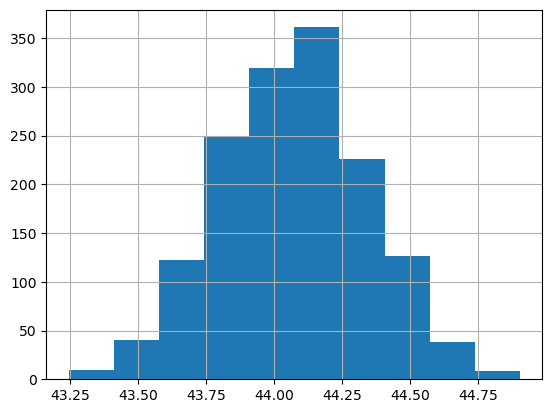

In [74]:
amostras.mean().hist()

In [75]:
dados.Idade.mean()

44.07142113482561

In [76]:
amostras.mean().mean()

44.07055733333334

O TLC afirma que a média das médias amostrais é igual a média da população e o desvio padrão é igual ao desvio padrão da populaçao dividio pela raiz de n, onde n é o tamanho da amostra

In [77]:
dados.Idade.std()

12.480583465360187

In [78]:
amostras.mean().std() 

0.2727033830672313

In [79]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

# Problema dos Sacos de Arroz


Suponha que os pesos dos sacos de arroz de uma industria alimenticia distribuem aproximadamente como uma normal de desvio padrao igual a 150g. Selecionada uma amostra aleatoria de 20 sacos de um lote especifico, obteve-se um peso medio de 5.050g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%

Nivel de significancia = 5% => Nivel de Confiança = 95%

In [80]:
media_amostral = 5050
desvio_padrao_populacional = 150
n_amostra = 20

Olhando a Tabela Padronizada temos que Z vale 1.96

Outro modo, podemos usar o scipy

In [81]:
z = norm.ppf(0.975)
z

1.959963984540054

In [82]:
desvio_padrao_media_amostral = desvio_padrao_populacional / np.sqrt(n)
desvio_padrao_media_amostral

3.3541019662496843

In [83]:
norm.interval(loc = media_amostral, scale = desvio_padrao_media_amostral, confidence = 0.95)

(5043.4260809456755, 5056.5739190543245)

O interval já retorna o intervalo de confiança desejado

# Problema da rede de fast food

In [84]:
n_amostra = 50
desvio_padrao_pop = 6
confianca = 0.95

Olhando na tabela padronizada, Z = 1.96

In [85]:
e = 1.96 * (desvio_padrao_pop / np.sqrt(n_amostra))
e

1.6631151493507597

# Problema 

In [86]:
n_amostra = 1976
desvio_padrao_pop = 11
media_amostral = 28
cofianca = 0.9

In [87]:
norm.interval(confidence = 0.9, loc = media_amostral, scale = (desvio_padrao_pop / np.sqrt(n_amostra)))

(27.592969951356466, 28.407030048643534)

# Problema do Rendimento Médio

In [88]:
erro = 100
confianca = 0.95
desvio_padrao_populacional = 3323.39

Olhando a Tabela padrozinada, z = 1.96

In [89]:
z = norm.ppf(0.975)

In [90]:
n = (z * (desvio_padrao_populacional / erro)) ** 2
n

4242.860955311813

# Problema 

In [91]:
media_amostral = 45.50
desvio_padrao_pop = 15
confiança = 0.90
erro = 0.1 * media_amostral

In [92]:
z = norm.ppf(0.9505)

In [93]:
n = (z * (desvio_padrao_pop / erro)) ** 2
n

29.5788145050659

# Problema da Industria de Refrigerantes

In [94]:
N = 10000

In [95]:
z = norm.ppf(0.5 + (0.95/2))
z

1.959963984540054

In [96]:
erro = 5

In [97]:
s = 12

In [98]:
n = ((z ** 2) * (s**2) * N) / (((z**2) * (s**2)) + ((erro**2) * (N-1)))
n

22.080154500190364

# Problema dos Sacos de Farinha

In [99]:
N = 2000
s = 480
e = 300
confianca = 0.95

In [100]:
z = norm.ppf(0.5 + (confianca /2))
z

1.959963984540054

In [101]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e **2) * (N-1)))
n

9.790887571738981

# Projeto Final 

In [102]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [103]:
dados.Sexo.value_counts(normalize = True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

A propocao de homens como chefes de domicilios é quase 70%

Precisamos analisar a probabilidade de um grupo selecionado ao acaso ser composto por 7 homens e 3 mulheres.Isso indica que temos uma distribuição binomial, onde o "acerto" está quando um homem é selecionado e o "erro" o caso contrário. Portanto, temos

In [121]:
p = 0.5
q = 0.5

In [122]:
k = 7
n = 10

In [145]:
binom.pmf(7, 10 , 0.7)

0.26682793200000005

Logo, a probabilidade de um grupo ao acaso selecionado for composto por 7 homens e 3 mulheres é de 26.68%

In [146]:
quant_grupos = 100 * 0.2668
quant_grupos

26.68

Precisariamos selecionar aproximadamente 27 grupos de 10 individuos para conseguir 100 grupos compostos por 7 homens e 3 mulheres.

In [128]:
amostras = pd.DataFrame()

In [131]:
amostra = dados.Renda.sample(n = 200, random_state = 101)
amostra

29042     480
62672     250
29973     788
22428    1680
55145    2500
         ... 
50497    3400
3668      780
4872     1000
38670    1000
71730     600
Name: Renda, Length: 200, dtype: int64

In [169]:
media_amostra = amostra.mean()
media_amostra

1964.205

In [143]:
desvio_padrao_amostral = amostra.std()
desvio_padrao_amostral

3139.8855167452157

In [135]:
z = norm.ppf(0.5 + (0.9/2))
z

1.6448536269514722

In [151]:
n = (z * (desvio_padrao_amostral / (0.1 * media_amostra))) ** 2
n

691.3667931987947

Portanto, o tamanho da amostra deve ser de 691 elementos

In [167]:
100 * 691

69100

Custo da pesquisa = R$69100.00

Intervalo de confiança de 95%

In [163]:
z = norm.ppf(0.5 + (0.95/2))
z

1.959963984540054

In [164]:
n = (z * (desvio_padrao_amostral / (0.1* media_amostra))) ** 2
n

981.6353391213581

Portanto, o tamanho da amostra deve ser de 981 elementos

In [166]:
100 * 981

98100

Custo da pesquisa = R$98100.00

Intervalo de confiança de 99%

In [162]:
z = norm.ppf(0.5 + (0.99/2))
z

2.5758293035489004

In [161]:
n = (z * (desvio_padrao_amostral / (0.1 * media_amostra))) ** 2
n

1695.4623956639841

In [165]:
100 * 1695

169500

Custo da pesquisa de R$169500.00

Intervalo de Confiança viavel que está dentro do orçamento 95% - R$98100.00

In [171]:
norm.interval(confidence = 0.95, loc = media_amostra, scale = desvio_padrao_amostral/ np.sqrt(981))

(1767.7209049801454, 2160.6890950198544)

Margem de erro utilizando todo o recurso disponibilizado

In [172]:
n = 150000/100

In [175]:
z = norm.ppf(0.5 + (0.95/2))
e = z * (desvio_padrao_amostral / np.sqrt(n))
e

158.89721122673737

In [178]:
erro_percent = e/media_amostra
erro_percent

0.08089644982409544

A nova margem de erro é 8.09%